In [108]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
%matplotlib inline
import seaborn as sns
import matplotlib
from datetime import date
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [109]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<header><h2><p style="background-image:url('https://wallpaperbat.com/img/127773-light-blue-and-yellow-wallpaper.jpg');font-family:Georgia;color:#000000;font-size:150%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#000000;"><b>GENERAL:-</b></p></h2></header> 

In [110]:
#READ THE DATASET...
main_df = pd.read_csv("/content/marketing_campaign.csv", sep="\t")
main_df

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
0      5524        1957  Graduation         Single   58138.0        0   
1      2174        1954  Graduation         Single   46344.0        1   
2      4141        1965  Graduation       Together   71613.0        0   
3      6182        1984  Graduation       Together   26646.0        1   
4      5324        1981         PhD        Married   58293.0        1   
5      7446        1967      Master       Together   62513.0        0   
6       965        1971  Graduation       Divorced   55635.0        0   
7      6177        1985         PhD        Married   33454.0        1   
8      4855        1974         PhD       Together   30351.0        1   
9      5899        1950         PhD       Together    5648.0        1   
10     1994        1983  Graduation        Married       NaN        1   
11      387        1976       Basic        Married    7500.0        0   
12     2125        1959  Graduation       Divorced   63033.0        0   
13     8180        1952      Master       Divorced   59354.0        1   
14     2569        1987  Graduation        Married   17323.0        0   
15     2114        1946         PhD         Single   82800.0        0   
16     9736        1980  Graduation        Married   41850.0        1   
17     4939        1946  Graduation       Together   37760.0        0   
18     6565        1949      Master        Married   76995.0        0   
19     2278        1985    2n Cycle         Single   33812.0        1   
20     9360        1982  Graduation        Married   37040.0        0   
21     5376        1979  Graduation        Married    2447.0        1   
22     1993        1949         PhD        Married   58607.0        0   
23     4047        1954         PhD        Married   65324.0        0   
24     1409        1951  Graduation       Together   40689.0        0   
25     7892        1969  Graduation         Single   18589.0        0   
26     2404        1976  Graduation        Married   53359.0        1   
27     5255        1986  Graduation         Single       NaN        1   
28     9422        1989  Graduation        Married   38360.0        1   
29     1966        1965         PhD        Married   84618.0        0   
30     6864        1989      Master       Divorced   10979.0        0   
31     3033        1963      Master       Together   38620.0        0   
32     5710        1970  Graduation       Together   40548.0        0   
33     7373        1952         PhD       Divorced   46610.0        0   
34     8755        1946      Master        Married   68657.0        0   
35    10738        1951      Master         Single   49389.0        1   
36     4339        1970         PhD        Married   67353.0        0   
37    10755        1976    2n Cycle        Married   23718.0        1   
38     8595        1973  Graduation          Widow   42429.0        0   
39     2968        1943         PhD       Divorced   48948.0        0   
40     8601        1980  Graduation        Married   80011.0        0   
41      503        1985      Master        Married   20559.0        1   
42     8430        1957  Graduation       Together   21994.0        0   
43     7281        1959         PhD         Single       NaN        0   
44     2139        1975      Master        Married    7500.0        1   
45     1371        1976  Graduation         Single   79941.0        0   
46     9909        1996    2n Cycle        Married    7500.0        0   
47     7286        1968  Graduation       Together   41728.0        1   
48     7244        1951  Graduation         Single       NaN        2   
49     6566        1954         PhD        Married   72550.0        1   
50     8614        1957  Graduation          Widow   65486.0        0   
51     4114        1964      Master        Married   79143.0        0   
52     1331        1977  Graduation         Single   35790.0        1   
53     2225        1977  Graduation       Divorced   82582.0       

In [111]:

df = main_df.copy()
df.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [112]:

print("Shape of the DataFrame is :",df.shape)

Shape of the DataFrame is : (2240, 29)


In [113]:

print("Columns in DataFrame is :\n",df.columns)

Columns in DataFrame is :
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [114]:

print("Print a Summary of a Dataframe is :",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:125%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>Basic statistics:-</b></p>

In [115]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:125%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>Detecting the missing values:-</b></p>

In [116]:
#PERCENTAGE OF THE MISSING VALUES
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df)

Total  Percentage
Income                  24    1.071429
Response                 0    0.000000
MntSweetProducts         0    0.000000
Year_Birth               0    0.000000
Education                0    0.000000
Marital_Status           0    0.000000
Kidhome                  0    0.000000
Teenhome                 0    0.000000
Dt_Customer              0    0.000000
Recency                  0    0.000000
MntWines                 0    0.000000
MntFruits                0    0.000000
MntMeatProducts          0    0.000000
MntFishProducts          0    0.000000
MntGoldProds             0    0.000000
Z_Revenue                0    0.000000
NumDealsPurchases        0    0.000000
NumWebPurchases          0    0.000000
NumCatalogPurchases      0    0.000000
NumStorePurchases        0    0.000000
NumWebVisitsMonth        0    0.000000
AcceptedCmp3             0    0.000000
AcceptedCmp4             0    0.000000
AcceptedCmp5             0    0.000000
AcceptedCmp1             0    0.000000
AcceptedCmp2             0    0.000000
Complain                 0    0.000000
Z_CostContact            0    0.000000
ID                       0    0.000000

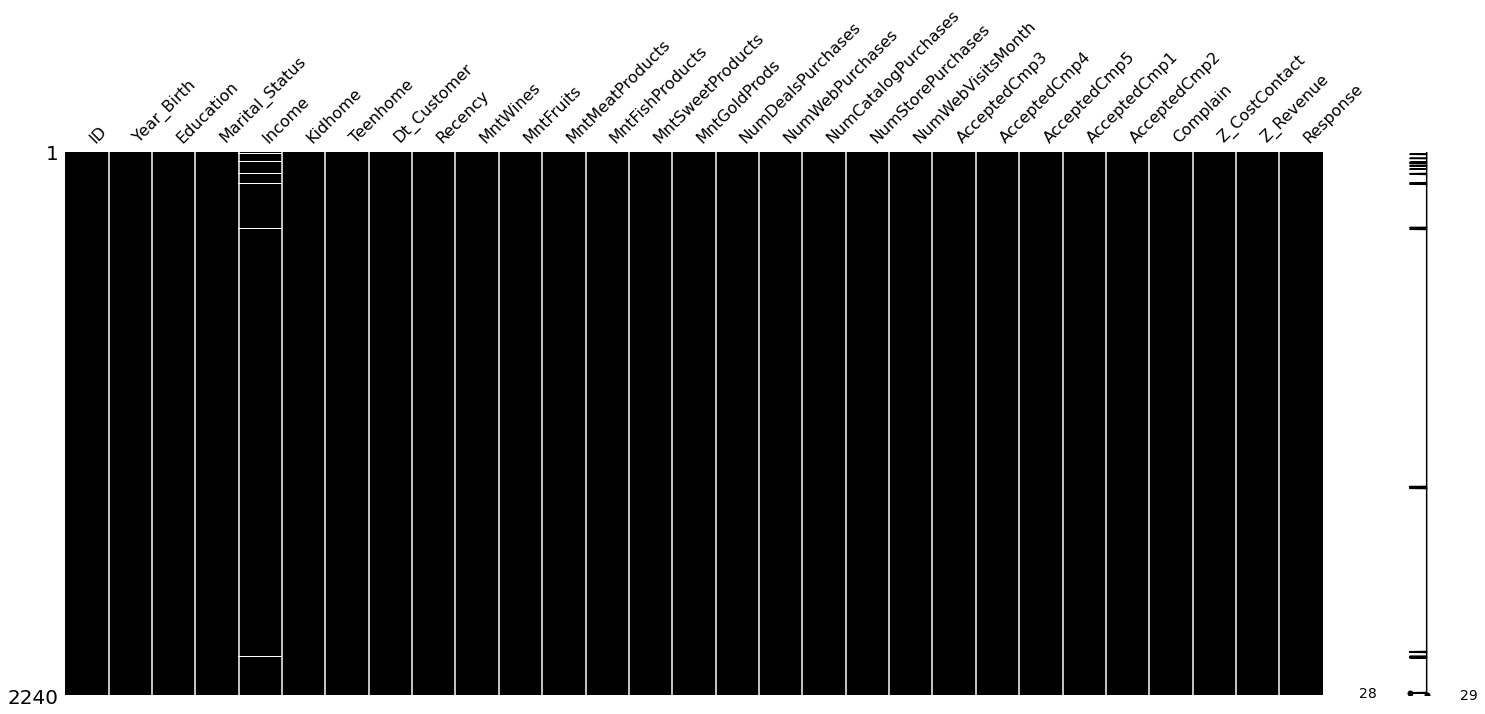

In [117]:
#LETS VISUALISE THE MISSING VALUES PRESENT IN THE DATASET..
import missingno as mn
mn.matrix(df,color = (0,0,0))

In [118]:
#FILL THE MISSING VALUES WITH THE MEDIAN VALUES.. 
df['Income']=df['Income'].fillna(df['Income'].median())

In [119]:
#CHECKING IF ANY NAN IS PRESENT IN COLUMN OR NOT....
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:125%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>Detecting the duplicates:-</b></p>

In [120]:
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

In [121]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

<header><p style= "background-color:#e9fafc;font-family:Georgia;color:#000000;font-size:100%;text-align:center;border-radius:10px 10px"><b>Note:-In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why , they are not going to contribute anything in the model building. So we can drop them.</b></p></header> 


<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:125%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>Droping the unwanted feature:-</b></p>

In [122]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0

<h2><p style="background-image: url('https://wallpaperbat.com/img/127773-light-blue-and-yellow-wallpaper.jpg');font-family:Georgia;color:#000000;font-size:150%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#000000;"><b>UNIVARIATE ANALYSIS:-</b></p></h2>
<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>1.Analysis on Year_Birth Variable.</b></p>


In [123]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Year_Birth"
print("Unique categories present in the Year_Birth:",df["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: 1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1977    52
1952    52
1968    51
1959    51
1954    50
1966    50
1960    49
1955    49
1982    45
1963    45
1967    44
1962    44
1951    43
1957    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     7
1995     5
1993     5
1994     3
1996     2
1940     1
1893     1
1899     1
1941     1
1900     1
Name: Year_Birth, dtype: int64



<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>2.Analysis On Education Variable.</b></p>

In [124]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [125]:
#CHANGING CATEGORY INTO "UG" AND "PG" ONLY....
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

Unique categories present in the Education: Post Graduate     2186
Under Graduate      54
Name: Education, dtype: int64




Text(0.5, 1.0, 'Frequency Of Each Category in the Education Variable \n')

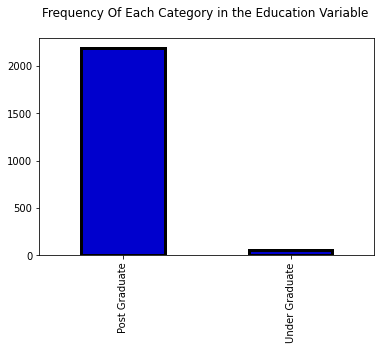

In [126]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Education"
print("Unique categories present in the Education:",df["Education"].value_counts())
print('\n')

#VISUALIZING THE "Education"
df['Education'].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Education Variable \n")


<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>OBSERVATIONS:-</b></p>

<p style= "background-color:#e9fafc;font-family:Georgia;color:#000000;font-size:80%;text-align:center;border-radius:10px 10px"><b>*97.58% of Customers in the dataset are "Post Graduate".<br>
    *2.410% of Customers in the dataset are "Under Graduate".</b></p>



<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>3.Analysis On Marital_Status Variable.</b></p>


In [127]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [128]:
#REPLACING THE CONFLICT VALUES IN Marital_status..
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

Unique categories present in the Marital_Status: Relationship    1444
Single           796
Name: Marital_Status, dtype: int64




Text(0.5, 1.0, 'Frequency Of Each Category in the Marital_Status Variable \n')

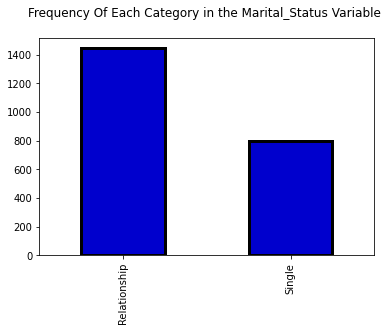

In [129]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Marital_Status"
print("Unique categories present in the Marital_Status:",df['Marital_Status'].value_counts())
print("\n")


#VISUALIZING THE "Marital_Status"
df['Marital_Status'].value_counts().plot(kind='bar',color = 'MediumBlue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Marital_Status Variable \n")


<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>OBSERVATIONS:-</b></p>

<p style= "background-color:#e9fafc;font-family:Georgia;color:#000000;font-size:80%;text-align:center;border-radius:10px 10px"><b>*64.46% of Customers in the dataset are in "Relationship".<br>
    *35.53% of Customers in the dataset are "Single".</b></p>


<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>4.Analysis On Income Variable.</b></p>

In [130]:
#Maximum Income
df['Income'].max()

666666.0

In [131]:
#Minimum Income
df['Income'].min()

1730.0

In [132]:
#AverageIncome
df['Income'].mean()

52237.97544642857

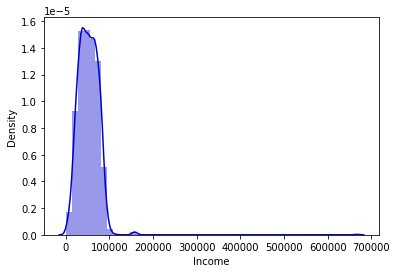

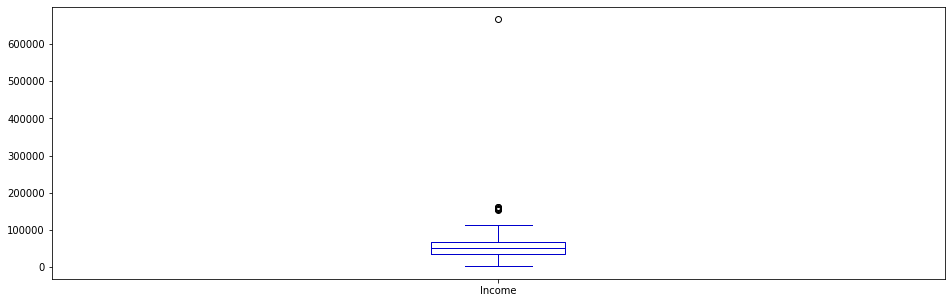

In [133]:
sns.distplot(df["Income"],color = 'Mediumblue')
plt.show()
df["Income"].plot.box(figsize=(16,5),color = 'MediumBlue')
plt.show()

<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>5.Analysis On "Kidhome,Teenhome" Variable.</b></p>


In [134]:
df['Kidhome'].unique()

array([0, 1, 2])

In [135]:
df['Teenhome'].unique()

array([0, 1, 2])

In [136]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']

Unique categories present in the Kids: 1    1128
0     638
2     421
3      53
Name: Kids, dtype: int64




Text(0.5, 1.0, 'Frequency Of Each Category in the Kids Variable \n')

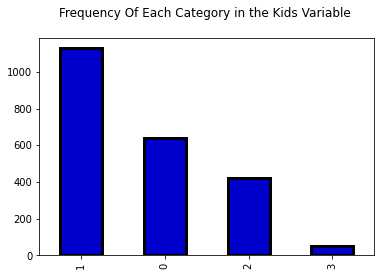

In [137]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Kids"
print("Unique categories present in the Kids:",df['Kids'].value_counts())
print("\n")

#VISUALIZING THE "Kids"
df['Kids'].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Kids Variable \n")


<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>OBSERVATIONS :-</b></p>
<p style= "background-color:#e9fafc;font-family:Georgia;color:#000000;font-size:80%;text-align:center;border-radius:10px 10px"><b>*50.35%  of Customers in the dataset have 1 kid.<br>
    *28.48%  of Customers in the dataset have no kids.<br>
    *18.79%  of Customers in the dataset have 2 kids.<br>
    *2.36%  of Customers in the dataset have 3 kids.</b></p>




<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>6.Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds" Variable.</b></p>


In [138]:
df['MntWines'].unique()

array([ 635,   11,  426,  173,  520,  235,   76,   14,   28,    5,    6,
        194,  233,    3, 1006,   53,   84, 1012,    4,   86,    1,  867,
        384,  270,   36,  684,    8,  112,  110,   96,  482,   40,  702,
         55,  437,  421,   13,    9,   81,  123,   48,  826,  245,  650,
         12,  510,  328,  984,  295,  447,  712,  452,  523,  546,  398,
         10,  688,  247,  856,  496,   25,  258,  565,    2,  721, 1032,
        577,   64,  163,   17,  130,  292,  350,  135,  230,    7,  445,
         15,   27,  505,   51,  207,   41,  386,  562,  217,  144,  454,
        425, 1332,  527,  490,  378,  547,   47,  320,   34,  722,  162,
        450,   70,  352,  492,  120,  534,  236,  231,  220,  796,    0,
        962,  738,  399,  614,   32,  598,   73,   42,  346,  888,  997,
        212,  536, 1349, 1001,   20,   18,  125,  277,   85,   59, 1149,
        847,   29,  152,  620,   35,  356,  783,  466,   23,  656,  519,
        344,  448,  265,  587,  763,   22,   54, 11

In [139]:
df['MntFruits'].unique()

array([ 88,   1,  49,   4,  43,  42,  65,  10,   0,   5,  16,  61,   2,
        14,  22,  80,  17,   3, 100,  12,  34,   8,  76,  11, 164,  18,
         6,  50,  19,  37, 120,   9,  51,  35,  26,   7,  40,  59,  36,
       107, 111, 105,  23,  60,  46, 172,  81, 106, 194, 115,  44,  99,
        90,  48,  27,  33, 133,  58,  28,  21,  20, 162,  71,  66,  30,
       189, 138,  29,  24,  32,  86, 114, 153,  64, 134, 148,  47,  41,
        84,  74, 129,  15,  98, 183, 147, 144, 104,  91, 163, 152,  53,
        68, 137, 190,  38,  70,  96,  25,  13,  83,  92,  73, 155,  54,
       151,  85, 127,  63,  45, 103,  69,  89, 181, 112, 159, 102, 123,
       166, 142,  79,  39,  31, 178,  93,  97, 168, 174, 122, 199,  62,
        55, 101,  67, 117, 108,  57, 130, 161,  56, 124, 126,  75, 185,
        72,  87, 197,  82, 184, 160,  77, 140, 131, 132, 169, 193, 149,
       143, 154])

In [140]:
df['MntMeatProducts'].unique()

array([ 546,    6,  127,   20,  118,   98,  164,   56,   24,   11,  480,
         53,   17,  115,   19,   38,  498,   73, 1725,   86,  102,   27,
         25,   30,    3,   42,  801,   10,   44,    5,   96,  471,  151,
         14,  206,  536,   29,   50,  266,   15,   48,  317,  125,  780,
        550,  124,  432,  482,    8,   22,   28,  538,  134,  367,    1,
        309,  159,  487,  460,   43,  291,   65,   13,  925,  779,   64,
         68,  424,   16,   37,  568,   39,  192,  359,   26,    7,  447,
         92,  183,  276,  690,   32,  271,   31,  106,  292,  311,   21,
        101,  812,   94,  133,  951,  110,   47,  189,  196,   33,  590,
         34,   12,  921,  232,  756,  132,   41,  141,   18,   90,   78,
         57,  269,   69,  387,  249,   49,  240, 1582,  305,  449,  119,
        195,    2,  107,  537,   45,  813,   79,  553,  337,  138,  113,
        320,  319,   59,  554,  171,    4,  417,  162,  540,  154,  207,
        204,  740,    9,  137,  184,  464,  757,  5

In [141]:
df['MntFishProducts'].unique()

array([172,   2, 111,  10,  46,   0,  50,   3,   1,  11, 225,   6,  59,
       150,  30,  69,  21,  39,  15,  20,  34,  33, 119, 160,  82, 227,
        37,  27, 156,  12, 180, 121,  16, 201,   7,  58, 189,  17,  84,
         4,  97, 137, 110,  49,  98,  75,  65, 185,  80,  31,  23,  29,
       151, 123,  44,  40, 173,  38,  52,  13,  36,  43,  73,  32,   8,
        19, 149, 134,  86, 140, 147, 224,  42,  76,  47, 254,  25,  67,
        28, 186, 218, 104, 133, 220,  45,  24, 205, 162,  95, 101, 188,
        55, 166, 216,  60, 219,  77,  78,  72, 212, 129,  93,  99, 102,
       179,  61,  62, 197, 199, 120, 169, 240,  63,  91, 106, 146,  56,
       127, 136, 168,  54, 132,  71,  64, 231,  85, 202,  41, 125,  26,
       175, 164, 177, 138, 247, 159, 153,  90,  51, 234,  68, 210,  89,
       194, 250, 237, 145, 167,  48, 192, 130, 232, 116, 184, 158,  94,
       259, 115, 207, 112, 182, 141, 124, 171, 193, 242, 246,  35, 142,
       253, 258, 198, 223,   5, 103, 108, 181,  81, 128, 208, 11

In [142]:
df['MntSweetProducts'].unique()

array([ 88,   1,  21,   3,  27,  42,  49,   2, 112,   5,  68,  13,  12,
        16,  24,  38,   0,  32,   6, 263,  66,  22,   8,   7, 178,  30,
        10,  67, 167,  40, 120,  18,  14, 122,  82,  29,  60,   4,  37,
        15, 105,  65, 133,  28,  61, 132,  26,  98,  35,  51,  20, 103,
         9,  72,  89,  41,  71,  44,  33,  11,  91,  76,  17, 113,  19,
       173,  23,  87, 176, 102,  48, 138, 163, 124,  70, 172,  84, 149,
        73,  92, 130,  25,  74, 114, 141,  54, 147,  45,  50,  46,  97,
        64, 118, 153, 189, 107, 128, 134,  36, 150,  78, 137,  34,  95,
       156,  47, 194,  96, 191, 192,  75,  62,  58, 129,  31,  57, 108,
       123, 185, 121, 127, 125, 198,  43, 115,  80, 106, 101, 110,  83,
       160, 166, 136,  56, 116, 182, 148, 161,  69, 157,  55, 143, 169,
        86, 146,  59, 152,  77,  53,  39,  93, 151,  99, 144, 195,  63,
       175, 145, 162, 187, 126,  85, 109, 197, 165, 174, 196,  81, 139,
       188, 142,  94, 262, 179, 100,  79, 111])

In [143]:
df['MntGoldProds'].unique()

array([ 88,   6,  42,   5,  15,  14,  27,  23,   2,  13,   1,  16,  30,
        45,   4,  28, 176,  39,  48,  19,  99,  41, 362,  10,   0,  89,
         3,  43,  22,  35,  36, 102,   7,  12, 174,  50,  38,  32, 241,
       109, 190,  40,  80, 169,  73,  17,  86,   9,  18,  51,  76,  34,
       145,  53,  75, 223,  11, 111,  81,  65,  79,  60,  72,  33, 120,
       168, 172, 216,  58, 130, 124,  20, 126, 116,  49,   8,  91,  57,
        26, 141, 117,  25,  92,  54,  21, 192,  44,  66, 182, 181, 152,
        77,  70, 148,  24,  69, 146, 162, 131,  74, 135, 203,  52,  63,
        61, 139, 122, 224, 173, 218,  93, 142,  29, 233, 101, 157,  55,
       107, 159,  78, 110, 125, 114,  68, 191,  95,  37,  64,  46, 119,
        90, 134, 108, 153,  84,  59,  31, 175,  85,  71,  47, 118,  83,
       106, 165, 163, 144, 147, 207, 151, 154, 115,  67, 242, 155, 249,
       183, 170,  97, 227, 121, 205, 112, 198, 177, 133,  94,  56,  82,
       187, 171,  98, 129,  96, 166, 195, 231, 158, 123, 200, 17

In [144]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [145]:
#Minimum Expenses
df['Expenses'].min()

5

In [146]:
#Maximum Expenses
df['Expenses'].max()

2525

In [147]:
#Average Expenses
df['Expenses'].mean()

605.7982142857143

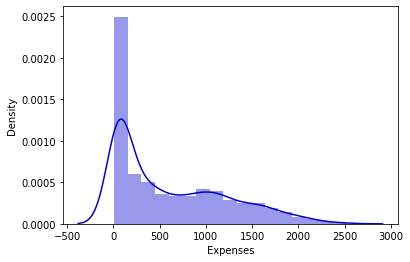

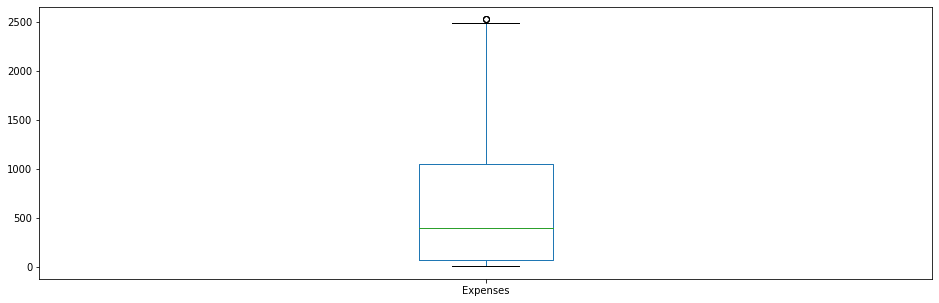

In [148]:
sns.distplot(df["Expenses"],color = 'mediumblue')
plt.show()
df["Expenses"].plot.box(figsize=(16,5))
plt.show()

<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>7.Analysis on "AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5" Variable.</b></p>

In [149]:
df['AcceptedCmp1'].unique()

array([0, 1])

In [150]:
df['AcceptedCmp2'].unique()

array([0, 1])

In [151]:
df['AcceptedCmp3'].unique()

array([0, 1])

In [152]:
df['AcceptedCmp4'].unique()

array([0, 1])

In [153]:
df['AcceptedCmp5'].unique()

array([0, 1])

In [154]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

Unique categories present in the TotalAcceptedCmp: 0    1777
1     325
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64




Text(0.5, 1.0, 'Frequency Of Each Category in the TotalAcceptedCmp Variable \n')

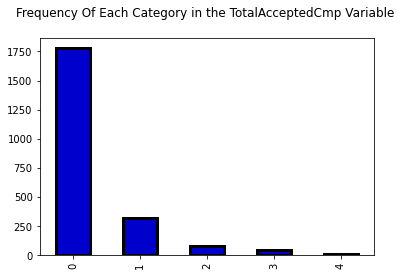

In [155]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "TotalAcceptedCmp"
print("Unique categories present in the TotalAcceptedCmp:",df['TotalAcceptedCmp'].value_counts())
print("\n")

#VISUALIZING THE "TotalAcceptedCmp"
df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n")


    
<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>OBSERVATIONS :-</b></p>
    
    
<p style= "background-color:#e9fafc;font-family:Georgia;color:#000000;font-size:80%;text-align:center;border-radius:10px 10px"><b>*79.33%  of Customers accepted the offer in the campaign are "0".<br> 
    *14.50%  of Customers accepted the offer in the campaign are "1".<br>
    *3.70%  of Customers accepted the offer in the campaign are "2".<br>
    *1.96%  of Customers accepted the offer in the campaign are "3".<br>
    *0.49%  of Customers accepted the offer in the campaign are "4".</b></p>


<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>8.Analysis on "NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases" Variable.</b></p>


In [156]:
df['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25])

In [157]:
df['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22])

In [158]:
df['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1])

In [159]:
df['NumDealsPurchases'].unique()

array([ 3,  2,  1,  5,  4, 15,  7,  0,  6,  9, 12,  8, 10, 13, 11])

In [160]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44])

In [161]:
#Minimum NumTotalPurchases
df['NumTotalPurchases'].min()

0

In [162]:
#Maximum NumTotalPurchases
df['NumTotalPurchases'].max()

44

In [163]:
#Mean NumTotalPurchases
df['NumTotalPurchases'].mean()

14.862053571428572

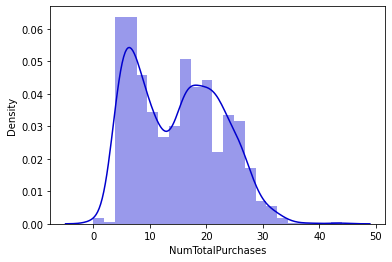

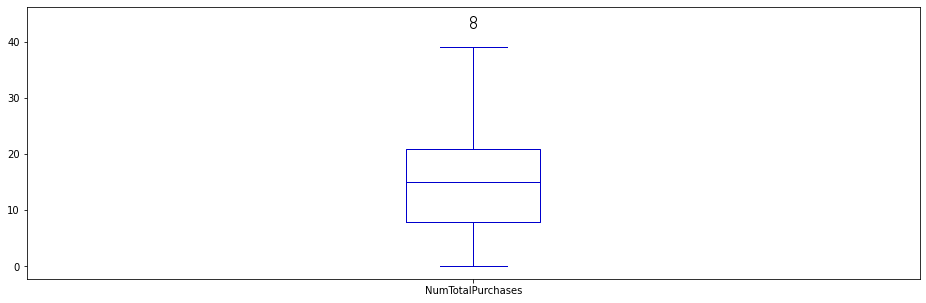

In [164]:
sns.distplot(df["NumTotalPurchases"],color = 'mediumblue')
plt.show()
df["NumTotalPurchases"].plot.box(figsize=(16,5),color = 'mediumblue')
plt.show()

In [165]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head(10)

Year_Birth      Education Marital_Status   Income Dt_Customer  Recency  \
0        1957  Post Graduate         Single  58138.0  04-09-2012       58   
1        1954  Post Graduate         Single  46344.0  08-03-2014       38   
2        1965  Post Graduate   Relationship  71613.0  21-08-2013       26   
3        1984  Post Graduate   Relationship  26646.0  10-02-2014       26   
4        1981  Post Graduate   Relationship  58293.0  19-01-2014       94   
5        1967  Post Graduate   Relationship  62513.0  09-09-2013       16   
6        1971  Post Graduate         Single  55635.0  13-11-2012       34   
7        1985  Post Graduate   Relationship  33454.0  08-05-2013       32   
8        1974  Post Graduate   Relationship  30351.0  06-06-2013       19   
9        1950  Post Graduate   Relationship   5648.0  13-03-2014       68   

   Complain  Response  Kids  Expenses  TotalAcceptedCmp  NumTotalPurchases  
0         0         1     0      1617                 0                 25  
1         0         0     2        27                 0                  6  
2         0         0     0       776                 0                 21  
3         0         0     1        53                 0                  8  
4         0         0     1       422                 0                 19  
5         0         0     1       716                 0                 22  
6         0         0     1       590                 0                 21  
7         0         0     1       169                 0                 10  
8         0         1     1        46                 0                  6  
9         0         0     2        49                 1                  2

In [166]:
x = df.columns 
for i in x:
     print(i)

Year_Birth
Education
Marital_Status
Income
Dt_Customer
Recency
Complain
Response
Kids
Expenses
TotalAcceptedCmp
NumTotalPurchases


In [167]:
#NUMBER OF DAYS A CUSTOMER WAS ENGAGED WITH COMPANY...... 
#CHANGING "Dt_customer" into timestamp format......

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['First_day'] = '01-01-2015'
df['First_day'] = pd.to_datetime(df.First_day)
df['Day_engaged'] = (df['First_day'] - df['Dt_Customer']).dt.days

Unique categories present in the Age: 8    1189
7     557
9     494
Name: Age, dtype: int64




Text(0.5, 1.0, 'Frequency Of Each Category in the Age Variable \n')

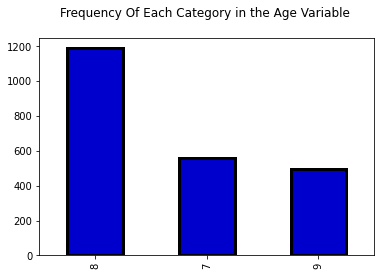

In [168]:
#ADDING A COLUMN "Age" IN THE DATAFRAME....
df['Age'] = (pd.Timestamp('now').year) - (pd.to_datetime(df['Dt_Customer']).dt.year)

#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Age"
print("Unique categories present in the Age:",df['Age'].value_counts())
print("\n")


#VISUALIZING THE "Age"
df['Age'].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Age Variable \n")


<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>OBSERVATIONS:-</b></p>

<p style= "background-color:#e9fafc;font-family:Georgia;color:#000000;font-size:80%;text-align:center;border-radius:10px 10px"><b>*53.08% are 8 years old customers.<br>
    *24.86% are 7 years old customers.<br>
*22.05% are 9 years old customers.</b></p>

In [169]:
df.head(5)

Year_Birth      Education Marital_Status   Income Dt_Customer  Recency  \
0        1957  Post Graduate         Single  58138.0  2012-04-09       58   
1        1954  Post Graduate         Single  46344.0  2014-08-03       38   
2        1965  Post Graduate   Relationship  71613.0  2013-08-21       26   
3        1984  Post Graduate   Relationship  26646.0  2014-10-02       26   
4        1981  Post Graduate   Relationship  58293.0  2014-01-19       94   

   Complain  Response  Kids  Expenses  TotalAcceptedCmp  NumTotalPurchases  \
0         0         1     0      1617                 0                 25   
1         0         0     2        27                 0                  6   
2         0         0     0       776                 0                 21   
3         0         0     1        53                 0                  8   
4         0         0     1       422                 0                 19   

   First_day  Day_engaged  Age  
0 2015-01-01          997    9  
1 2015-01-01          151    7  
2 2015-01-01          498    8  
3 2015-01-01           91    7  
4 2015-01-01          347    7

In [170]:
df=df.drop(columns=["Dt_Customer", "First_day", "Year_Birth", "Dt_Customer", "Recency", "Complain","Response"],axis=1)
df.head(5)

Education Marital_Status   Income  Kids  Expenses  TotalAcceptedCmp  \
0  Post Graduate         Single  58138.0     0      1617                 0   
1  Post Graduate         Single  46344.0     2        27                 0   
2  Post Graduate   Relationship  71613.0     0       776                 0   
3  Post Graduate   Relationship  26646.0     1        53                 0   
4  Post Graduate   Relationship  58293.0     1       422                 0   

   NumTotalPurchases  Day_engaged  Age  
0                 25          997    9  
1                  6          151    7  
2                 21          498    8  
3                  8           91    7  
4                 19          347    7

In [171]:
#REARRANGE THE ORDER OF COLUMNS:-
order = [0,1,3,4,6,7,8,2,5]
df = df[[df.columns[i] for i in order]]
df.head(5)

Education Marital_Status  Kids  Expenses  NumTotalPurchases  \
0  Post Graduate         Single     0      1617                 25   
1  Post Graduate         Single     2        27                  6   
2  Post Graduate   Relationship     0       776                 21   
3  Post Graduate   Relationship     1        53                  8   
4  Post Graduate   Relationship     1       422                 19   

   Day_engaged  Age   Income  TotalAcceptedCmp  
0          997    9  58138.0                 0  
1          151    7  46344.0                 0  
2          498    8  71613.0                 0  
3           91    7  26646.0                 0  
4          347    7  58293.0                 0

In [172]:
df.shape

(2240, 9)

<header><h2><p style="background-image:url('https://wallpaperbat.com/img/127773-light-blue-and-yellow-wallpaper.jpg');font-family:Georgia;color:#000000;font-size:150%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#000000;"><b>BIVARIATE ANALYSIS:-</b></p></h2></header> 

<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>1.Education vs Expenses</b></p>


In [173]:
pd.crosstab(df['Education'],df['Expenses'],margins=True)

Expenses        5  6  8  9  10  11  12  13  14  15  16  17  18  19  20  21  \
Education                                                                    
Post Graduate   1  2  4  2   5   5   2   6   2  10  10  13   8   5  14   8   
Under Graduate  0  0  0  0   0   0   0   0   1   0   1   0   2   0   0   1   
All             1  2  4  2   5   5   2   6   3  10  11  13  10   5  14   9   

Expenses        22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  \
Education                                                                    
Post Graduate   18  11   4  12   5   5   8   3  11  10  10   4  11   7   5   
Under Graduate   0   0   2   0   1   0   1   5   0   0   1   0   0   0   1   
All             18  11   6  12   6   5   9   8  11  10  11   4  11   7   6   

Expenses        37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  \
Education                                                                    
Post Graduate   13  13   7   7  11  11  11  15  12  18   9  14  11   6   6   
Under Graduate   1   1   0   0   0   0   3   0   1   1   1   0   0   1   0   
All             14  14   7   7  11  11  14  15  13  19  10  14  11   7   6   

Expenses        52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  \
Education                                                                    
Post Graduate    6   8  12  15   4  14   3   6   6   8   8  12   6   8   7   
Under Graduate   0   0   1   0   0   2   1   1   0   1   1   0   1   0   1   
All              6   8  13  15   4  16   4   7   6   9   9  12   7   8   8   

Expenses        67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  \
Education                                                                    
Post Graduate    8  10   8   7   7   9   3   2   4   7   4   8   6   2   8   
Under Graduate   0   0   1   0   0   0   0   1   2   0   0   0   0   3   0   
All              8  10   9   7   7   9   3   3   6   7   4   8   6   5   8   

Expenses        82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  \
Education                                                                    
Post Graduate    1   2   6   3   3   2   3   4   4   5   7   4   4   4   5   
Under Graduate   0   0   0   0   0   0   1   0   0   0   0   0   0   0   2   
All              1   2   6   3   3   2   4   4   4   5   7   4   4   4   7   

Expenses        97  98  99  100  101  102  103  106  107  108  109  112  114  \
Education                                                                      
Post Graduate    2   1   5    4    3    4    5    4    2    1    2    3    4   
Under Graduate   0   0   0    0    1    2    2    1    0    0    0    0    0   
All              2   1   5    4    4    6    7    5    2    1    2    3    4   

Expenses        115  116  117  119  120  121  122  123  124  125  126  127  \
Education                                                                    
Post Graduate     1    2    1    2    5    3    6    1    1    4    1    1   
Under Graduate    0    0    0    1    0    0    0    0    0    0    0    0   
All               1    2    1    3    5    3    6    1    1    4    1    1   

Expenses        128  129  130  131  132  133  134  135  137  138  139  140  \
Education                                                                    
Post Graduate     1    3    1    4    1    4    3    2    7    3    2    3   
Under Graduate    0    0    0    0    0    0    0    0    0    0    0    0   
All               1    3    1    4    1    4    3    2    7    3    2    3   

Expenses        141  143  144  145  146  147  148  149  151  152  153  155  \
Education                                                                    
Post Graduate     1    1    2    3    1    2    1    2    1    3    1    2   
Under Graduate    0    0    0    0    0    0    0    0    0    0    0    0   
All               1    1    2    3    1    2    1    2    1    3    1    2   

Expenses        156  157  158  159  160  161  162  163  165  167  169  170  \
Ed

In [174]:
fig = px.bar(df, x='Education', y='Expenses',color = 'Education')
fig.show()

<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>2.Marital status vs Expenses</b></p>


In [175]:
pd.crosstab(df['Marital_Status'],df['Expenses'],margins=True)

Expenses        5  6  8  9  10  11  12  13  14  15  16  17  18  19  20  21  \
Marital_Status                                                               
Relationship    0  0  3  2   4   4   2   3   1   6   7   8   6   3   8   4   
Single          1  2  1  0   1   1   0   3   2   4   4   5   4   2   6   5   
All             1  2  4  2   5   5   2   6   3  10  11  13  10   5  14   9   

Expenses        22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  \
Marital_Status                                                               
Relationship    13   7   3   8   3   1   4   4   9   6   6   2   9   2   4   
Single           5   4   3   4   3   4   5   4   2   4   5   2   2   5   2   
All             18  11   6  12   6   5   9   8  11  10  11   4  11   7   6   

Expenses        37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  \
Marital_Status                                                               
Relationship    12   9   4   6   9   6   9   8  11  14   7   9   5   6   4   
Single           2   5   3   1   2   5   5   7   2   5   3   5   6   1   2   
All             14  14   7   7  11  11  14  15  13  19  10  14  11   7   6   

Expenses        52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  \
Marital_Status                                                               
Relationship     5   6   8  12   2   8   4   3   5   8   6   8   4   5   7   
Single           1   2   5   3   2   8   0   4   1   1   3   4   3   3   1   
All              6   8  13  15   4  16   4   7   6   9   9  12   7   8   8   

Expenses        67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  \
Marital_Status                                                               
Relationship     4   8   7   5   4   6   1   2   5   3   4   8   5   3   6   
Single           4   2   2   2   3   3   2   1   1   4   0   0   1   2   2   
All              8  10   9   7   7   9   3   3   6   7   4   8   6   5   8   

Expenses        82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  \
Marital_Status                                                               
Relationship     1   1   2   3   0   2   2   2   3   3   4   2   1   1   6   
Single           0   1   4   0   3   0   2   2   1   2   3   2   3   3   1   
All              1   2   6   3   3   2   4   4   4   5   7   4   4   4   7   

Expenses        97  98  99  100  101  102  103  106  107  108  109  112  114  \
Marital_Status                                                                 
Relationship     2   1   3    4    1    4    5    3    1    0    2    1    2   
Single           0   0   2    0    3    2    2    2    1    1    0    2    2   
All              2   1   5    4    4    6    7    5    2    1    2    3    4   

Expenses        115  116  117  119  120  121  122  123  124  125  126  127  \
Marital_Status                                                               
Relationship      1    2    0    1    2    2    5    1    0    3    1    1   
Single            0    0    1    2    3    1    1    0    1    1    0    0   
All               1    2    1    3    5    3    6    1    1    4    1    1   

Expenses        128  129  130  131  132  133  134  135  137  138  139  140  \
Marital_Status                                                               
Relationship      1    2    1    1    1    2    3    0    5    1    1    2   
Single            0    1    0    3    0    2    0    2    2    2    1    1   
All               1    3    1    4    1    4    3    2    7    3    2    3   

Expenses        141  143  144  145  146  147  148  149  151  152  153  155  \
Marital_Status                                                               
Relationship      0    1    0    1    1    2    1    1    1    1    1    2   
Single            1    0    2    2    0    0    0    1    0    2    0    0   
All               1    1    2    3    1    2    1    2    1    3    1    2   

Expenses        156  157  158  159  160  161  162  163  165  167  169  170  \
Ma

In [176]:
fig = px.bar(df, x='Marital_Status', y='Expenses',color = 'Marital_Status')
fig.show()


<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>3.Kids vs Expenses</b></p>


In [177]:
pd.crosstab(df['Kids'],df['Expenses'],margins=True)

Expenses  5  6  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  \
Kids                                                                           
0         0  2  2  0   0   0   0   0   2   1   2   2   2   1   2   0   1   2   
1         1  0  0  0   3   1   1   3   1   5   4   4   4   4   8   3  12   5   
2         0  0  0  2   1   4   1   2   0   3   4   5   2   0   3   6   4   4   
3         0  0  2  0   1   0   0   1   0   1   1   2   2   0   1   0   1   0   
All       1  2  4  2   5   5   2   6   3  10  11  13  10   5  14   9  18  11   

Expenses  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  \
Kids                                                                           
0          1   0   2   0   2   1   3   0   0   0   2   1   0   1   0   0   0   
1          5   7   4   4   5   6   6   6   8   4   6   2   4   8   6   5   4   
2          0   5   0   1   1   1   2   4   3   0   3   2   1   3   7   2   3   
3          0   0   0   0   1   0   0   0   0   0   0   2   1   2   1   0   0   
All        6  12   6   5   9   8  11  10  11   4  11   7   6  14  14   7   7   

Expenses  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  \
Kids                                                                           
0          0   0   4   0   0   3   0   0   1   1   0   1   0   0   1   0   1   
1          4   9   7   6   6  13   6   9   2   5   4   4   5   5  10   2  11   
2          7   2   3   9   7   3   4   5   8   1   1   1   3   8   4   2   4   
3          0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
All       11  11  14  15  13  19  10  14  11   7   6   6   8  13  15   4  16   

Expenses  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  \
Kids                                                                           
0          1   0   3   1   0   0   2   1   2   1   0   1   0   2   1   1   1   
1          3   6   2   4   4   7   3   5   5   7   4   6   6   3   5   0   1   
2          0   1   1   2   5   4   2   2   1   0   6   2   1   1   3   2   1   
3          0   0   0   2   0   1   0   0   0   0   0   0   0   1   0   0   0   
All        4   7   6   9   9  12   7   8   8   8  10   9   7   7   9   3   3   

Expenses  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  \
Kids                                                                           
0          2   0   0   0   0   1   2   1   0   1   3   0   0   0   0   0   0   
1          3   5   1   6   6   4   2   0   1   5   0   3   1   1   2   1   2   
2          1   2   3   1   0   0   3   0   1   0   0   0   1   2   2   3   3   
3          0   0   0   1   0   0   1   0   0   0   0   0   0   1   0   0   0   
All        6   7   4   8   6   5   8   1   2   6   3   3   2   4   4   4   5   

Expenses  92  93  94  95  96  97  98  99  100  101  102  103  106  107  108  \
Kids                                                                          
0          0   1   0   1   2   0   0   0    1    0    1    0    0    1    0   
1          4   2   2   3   3   0   1   3    3    4    2    5    3    0    0   
2          3   1   2   0   2   2   0   1    0    0    2    1    0    1    1   
3          0   0   0   0   0   0   0   1    0    0    1    1    2    0    0   
All        7   4   4   4   7   2   1   5    4    4    6    7    5    2    1   

Expenses  109  112  114  115  116  117  119  120  121  122  123  124  125  \
Kids                                                                        
0           0    0    0    0    0    0    0    0    0    1    0    0    2   
1           2    2    3    1    1    0    3    2    1    4    1    0    2   
2           0    1    1    0    1    1    0    3    2    1    0    0    0   
3           0    0    0    0    0    0    0    0    0    0    0    1    0   
All         2    3    4    1    2    1    3    5    3    6    1    1    4   

Expenses  126  127  128  129  130  131  132  133  134  135  137  138  139  \
Kids                    

In [178]:
fig = px.bar(df, x='Kids', y='Expenses',color = 'Kids')
fig.show()

<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>4.TotalAcceptedCmp vs Expenses</b></p>


In [179]:
pd.crosstab(df['TotalAcceptedCmp'],df['Expenses'],margins=True)

Expenses          5  6  8  9  10  11  12  13  14  15  16  17  18  19  20  21  \
TotalAcceptedCmp                                                               
0                 1  2  4  2   5   5   1   6   3  10   9  13   9   5  14   9   
1                 0  0  0  0   0   0   1   0   0   0   2   0   1   0   0   0   
2                 0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
3                 0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
4                 0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
All               1  2  4  2   5   5   2   6   3  10  11  13  10   5  14   9   

Expenses          22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  \
TotalAcceptedCmp                                                               
0                 18  10   6  12   6   3   8   7  10   8  11   4   9   5   6   
1                  0   1   0   0   0   2   1   1   1   2   0   0   2   2   0   
2                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
All               18  11   6  12   6   5   9   8  11  10  11   4  11   7   6   

Expenses          37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  \
TotalAcceptedCmp                                                               
0                 14  14   7   7  11  11  14  14  13  17  10  13   5   6   5   
1                  0   0   0   0   0   0   0   1   0   0   0   1   6   1   1   
2                  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   
3                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
All               14  14   7   7  11  11  14  15  13  19  10  14  11   7   6   

Expenses          52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  \
TotalAcceptedCmp                                                               
0                  5   7  12  14   4  16   3   5   6   8   8  11   7   8   7   
1                  1   1   1   1   0   0   1   2   0   1   1   1   0   0   1   
2                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
All                6   8  13  15   4  16   4   7   6   9   9  12   7   8   8   

Expenses          67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  \
TotalAcceptedCmp                                                               
0                  8   9   7   7   6   8   3   3   6   7   3   7   6   3   7   
1                  0   1   2   0   1   1   0   0   0   0   1   1   0   2   1   
2                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
All                8  10   9   7   7   9   3   3   6   7   4   8   6   5   8   

Expenses          82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  \
TotalAcceptedCmp                                                               
0                  1   1   5   3   1   1   4   4   4   4   7   3   3   4   7   
1                  0   1   1   0   2   1   0   0   0   1   0   1   1   0   0   
2                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4                  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
All                1   2   6   3   3   2   4   4   4   5   7   4   4   4   7   

Expenses          97  98  99  100  101  102  103  106  107  108  109  112  \
TotalAcceptedCmp                                                            


In [180]:
fig = px.bar(df, x ='TotalAcceptedCmp', y ='Expenses',color = 'TotalAcceptedCmp')
fig.show()

<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>5.NumTotalPurchases vs Expenses</b></p>


In [181]:
pd.crosstab(df['NumTotalPurchases'],df['Expenses'],margins=True).head()

Expenses           5  6  8  9  10  11  12  13  14  15  16  17  18  19  20  21  \
NumTotalPurchases                                                               
0                  1  2  1  0   0   0   0   0   0   0   0   0   0   0   0   0   
1                  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
2                  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
4                  0  0  2  1   5   5   2   6   3  10  10  11  10   4   9   6   
5                  0  0  0  0   0   0   0   0   0   0   0   0   0   1   4   1   

Expenses           22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  \
NumTotalPurchases                                                               
0                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1                   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
2                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4                  11  10   3   6   1   2   5   0   4   1   0   0   0   1   0   
5                   4   1   3   4   4   2   2   4   3   2   7   1   7   0   2   

Expenses           37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  \
NumTotalPurchases                                                               
0                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2                   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
4                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5                   9   5   4   4   4   9   7   3   2   9   2   2   4   1   3   

Expenses           52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  \
NumTotalPurchases                                                               
0                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2                   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
4                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5                   2   1   4   3   0   1   1   3   3   1   1   1   0   0   0   

Expenses           67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  \
NumTotalPurchases                                                               
0                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5                   0   0   0   0   0   1   0   0   0   0   0   0   0   2   1   

Expenses           82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  \
NumTotalPurchases                                                               
0                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5                   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

Expenses           97  98  99  100  101  102  103  106  107  108  109  112  \
NumTotalPurchases                                                            
0                   0   0   0    0    0    0    0    0    0    0    0    0   
1                   0   0   0    0    0    0    0    0    1    0    0    0   
2                   0   0   0    0    0    0    0    0    0    0    0    0   
4                   0   0   0    0    0    0    0    0    0    0    0    0   
5                   0   0   0    0    0    0    0    0    0    0    0    0   

Expenses           114  115  116  117  119  1

In [182]:
fig = px.bar(df, x ='NumTotalPurchases', y ='Expenses',color = 'NumTotalPurchases')
fig.show()

In [184]:
fig = px.bar(df, x ='Day_engaged', y ='Expenses',color = 'Day_engaged')
fig.show()

In [186]:
fig = px.bar(df, x ='Age', y ='Expenses',color = 'Age')
fig.show()

<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:125%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>Finding the correlation:-</b></p>

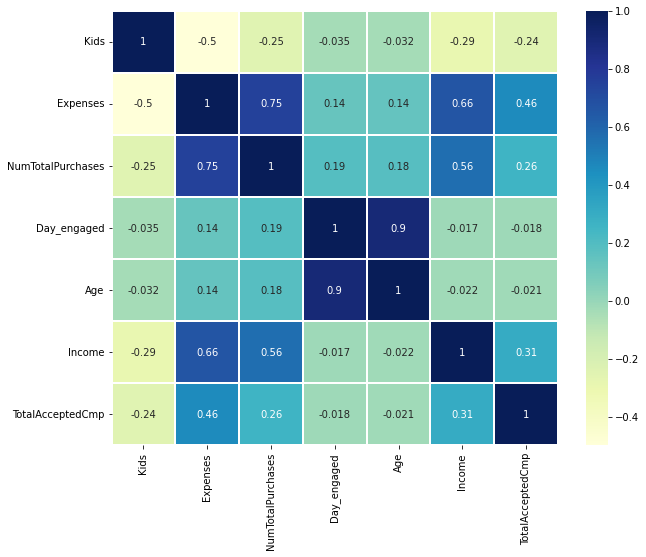

In [189]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap = 'YlGnBu',linewidths=1)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Kids               2240 non-null   int64  
 3   Expenses           2240 non-null   int64  
 4   NumTotalPurchases  2240 non-null   int64  
 5   Day_engaged        2240 non-null   int64  
 6   Age                2240 non-null   int64  
 7   Income             2240 non-null   float64
 8   TotalAcceptedCmp   2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


In [191]:
cont_features = df.iloc[:, 2:9] 
print(type(cont_features))
print('\n')
print(cont_features.head())

<class 'pandas.core.frame.DataFrame'>


   Kids  Expenses  NumTotalPurchases  Day_engaged  Age   Income  \
0     0      1617                 25          997    9  58138.0   
1     2        27                  6          151    7  46344.0   
2     0       776                 21          498    8  71613.0   
3     1        53                  8           91    7  26646.0   
4     1       422                 19          347    7  58293.0   

   TotalAcceptedCmp  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


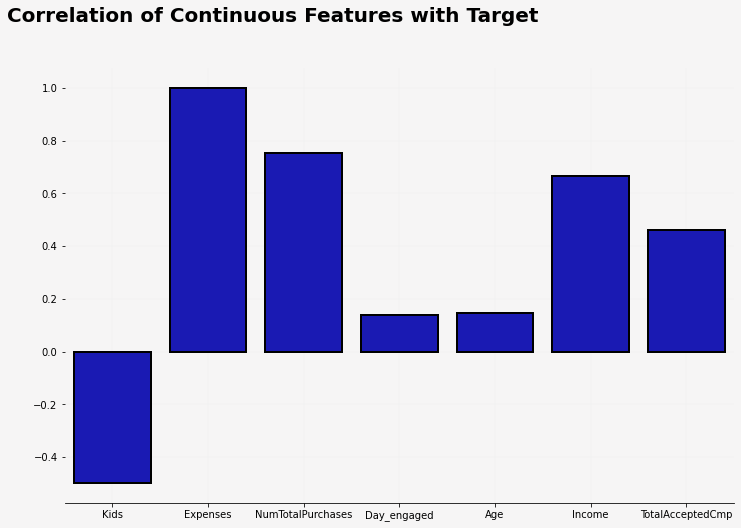

In [192]:
import matplotlib
background_color = "#f6f5f5"

fig = plt.figure(figsize=(12, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#2f5586", "#f6f5f5","#2f5586"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Continuous Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(cont_features.corrwith(df['Expenses']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='mediumblue', zorder=3, edgecolor='black', linewidth=2)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()


 <p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>OBSERVATIONS :-</b></p>
   
    
    
<p style= "background-color:#e9fafc;font-family:Georgia;color:#000000;font-size:80%;text-align:center;border-radius:10px 10px"><b>*Highest correlation between features is 0.7.<br>*There is no continuous features that has correlation with Expenses below 0.7 and above 0.15.<br>
*Day_engaged and Age has the lowest correlation with expenses,almost reaching 0.14 while NumTotalPurchases has the highest correlation with the expenses.</b></p>


In [193]:
df.dtypes

Education             object
Marital_Status        object
Kids                   int64
Expenses               int64
NumTotalPurchases      int64
Day_engaged            int64
Age                    int64
Income               float64
TotalAcceptedCmp       int64
dtype: object

In [194]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(" Object are:",cate)

 Object are: ['Education', 'Marital_Status']


In [195]:
Int = []
for i in df.columns:
    if (df[i].dtypes == "int64"):
        Int.append(i)

print(" Integers are:",Int)

 Integers are: ['Kids', 'Expenses', 'NumTotalPurchases', 'Day_engaged', 'Age', 'TotalAcceptedCmp']


In [196]:
Float = []
for i in df.columns:
    if (df[i].dtypes == "float64"):
        Float.append(i)

print("Float are:",Float)

Float are: ['Income']


In [197]:
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [198]:
df1 = df.copy()

In [199]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df1.values)
sf_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [200]:
sf_df.head()

Education  Marital_Status      Kids  Expenses  NumTotalPurchases  \
0  -0.157171        1.346874 -1.264505  1.679417           1.320826   
1  -0.157171        1.346874  1.396361 -0.961275          -1.154596   
2  -0.157171       -0.742460 -1.264505  0.282673           0.799685   
3  -0.157171       -0.742460  0.065928 -0.918094          -0.894025   
4  -0.157171       -0.742460  0.065928 -0.305254           0.539114   

   Day_engaged       Age    Income  TotalAcceptedCmp  
0     1.976745  1.502225  0.235696         -0.439037  
1    -1.667011 -1.420036 -0.235454         -0.439037  
2    -0.172468  0.041094  0.773999         -0.439037  
3    -1.925433 -1.420036 -1.022355         -0.439037  
4    -0.822831 -1.420036  0.241888         -0.439037

In [201]:
X = sf_df.iloc[:, [7, 3]].values
print(X)

[[ 0.23569584  1.67941681]
 [-0.23545419 -0.96127545]
 [ 0.77399892  0.28267329]
 ...
 [ 0.18947568  1.05495122]
 [ 0.67940139  0.39394775]
 [ 0.02520835 -0.7204576 ]]


<header><h2><p style="background-image:url('https://wallpaperbat.com/img/127773-light-blue-and-yellow-wallpaper.jpg');font-family:Georgia;color:#000000;font-size:150%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#000000;"><b>ELBOW METHOD-NOW LETS FIND THE NUMBER OF CLUSTERS :-</b></p></h2></header> 

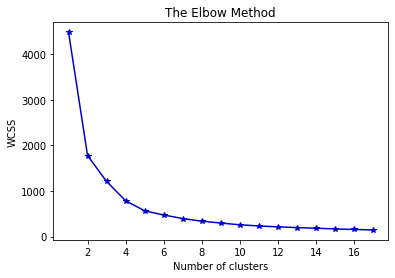

In [202]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss,color = "mediumblue",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<header><h2><p style="background-image:url('https://wallpaperbat.com/img/127773-light-blue-and-yellow-wallpaper.jpg');font-family:Georgia;color:#000000;font-size:150%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#000000;"><b>KMEANS CLUSTERING:-</b></p></h2></header> 


In [203]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(X)

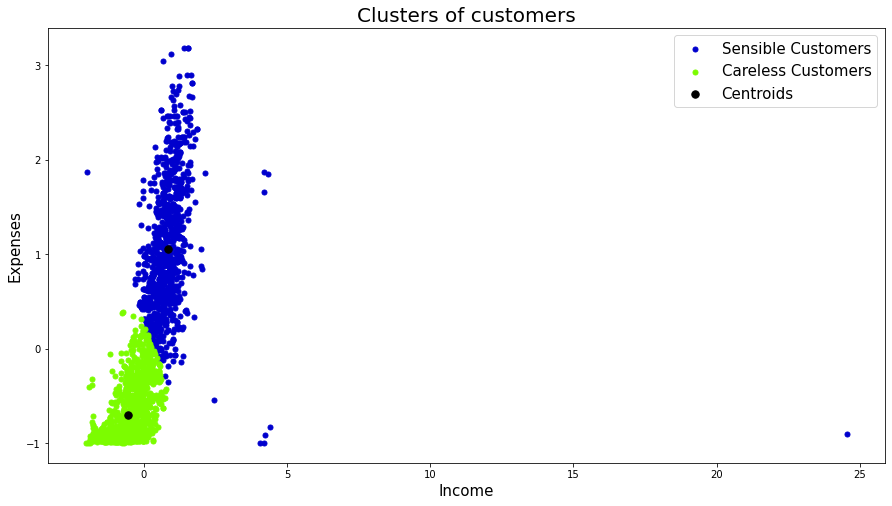

In [204]:
# Visualising the clusters
plt.figure(figsize= (15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'mediumblue', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'lawngreen', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:110%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>OBSERVATIONS :-</b></p>

<p style= "background-color:#e9fafc;font-family:Georgia;color:#000000;font-size:70%;text-align:center;border-radius:10px 10px"><b>*Customer who has Low income and Low Expenses are Sensible customers.<br>
    *Customer who has Low income and High Expenses are Careless customers.</b></p>

<header><h2><p style="background-image:url('https://wallpaperbat.com/img/127773-light-blue-and-yellow-wallpaper.jpg');font-family:Georgia;color:#000000;font-size:150%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#000000;"><b>OVERALL SUMMARY:-</b></p></h2></header> 
<p style= "background-color:#e9fafc;font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px"><b>* The highest Birth rate of customers is 87.<\b><br>
<b>* 97.58% of the customers are "Post graduated"<\b><br>.
<b>* More than half of the customers are in a relationship - 64.46%.<\b><br>
<b>* Minimum Expenses - 5.<\b><br>
<b>* Maximum Expenses - 2525.<\b><br>
<b>* Mean Expenses - 605.7982.<\b><br>
<b>* 79.33% of the customers who accepted the offer in the campaign is 0.<\b><br> 
<b>* Minimum  NumTotalPurchases - 0.<\b><br>
<b>* Maximum NumTotalPurchases - 44.<\b><br>
<b>* Mean NumTotalPurchases - 14.8620.<\b><br>
<b>* More than half are 8 years old customers.<\b><br>
<b>* Minimum Income - 1730.<\b><br>
<b>* Maximum Income - 666666.<\b><br>
<b>* Mean Income - 52237.9754.<\b><br>
<b>* The highest Expenses rate for Post Graduated Customers is 97.58%.<\b><br>
<b>* The highest Expenses rate for Customers who are in a Relationship is 64.46%.<\b><br>
<b>* The highest Expenses rate for Customers who have one Kid is 50.35%.<\b><br>
<b>* The highest Expenses rate for Customers who accepted the offer in the campaign "0" is 79.33%.<\b><br>
<b>* The highest Expenses rate for 8 years old Customers is 53.08%.<\b><br></p>